In [39]:
using DelimitedFiles
using Plots; gr();
using StatGeochem
using Random

In [18]:
datadir = "remote/si_weighted/rejection_fake"
# datadir = "remote/base/rejection_fake_noecl"
metadir = datadir[1:findlast("/", datadir)[1]-1]

"remote/si_weighted"

In [31]:
ures, h = readdlm("../data/$datadir/results-upper.csv", ',', header=true)
mres, h = readdlm("../data/$datadir/results-middle.csv", ',', header=true)
lres, h = readdlm("../data/$datadir/results-lower.csv", ',', header=true)

([3175.9488991230464 7.024660667651448 … 0.0 2.0; 2402.3716457439477 5.433412656351405 … 0.0 3.0; … ; 3095.1621587536006 6.757241055561217 … 0.0 4.0; 3271.7983981619523 6.806128428603031 … 0.0 3.0], AbstractString["sample_rho" "sample_vp" … "exhumed" "bin"])

In [32]:
ures

50000×67 Array{Float64,2}:
 3231.05  7.18552  1.74157  51.8574  NaN  NaN  …  25.4227  35.3896  0.0  4.0
 2835.75  6.60092  1.77248  46.5274  NaN  NaN     24.0758  38.83    0.0  3.0
 3158.46  7.09257  1.76806  35.7379  NaN  NaN     34.4519  46.6613  0.0  2.0
 2698.0   6.13687  1.63591  39.1461  NaN  NaN     22.2325  34.6268  0.0  2.0
 2457.08  5.57948  1.47447  37.5232  NaN  NaN     21.3548  28.4834  0.0  2.0
 3208.38  6.99868  1.7515   49.329   NaN  NaN  …  24.0128  34.736   0.0  4.0
 2873.92  5.85507  1.5737   32.3209  NaN  NaN     22.4281  31.6177  0.0  2.0
 3211.0   7.00679  1.75187  35.7798  NaN  NaN     26.6875  33.61    0.0  2.0
 2650.83  5.93775  1.62539  42.8282  NaN  NaN     28.743   48.746   0.0  3.0
 2787.83  6.5361   1.74716  29.6488  NaN  NaN     21.3092  32.1404  0.0  1.0
 2490.3   5.62604  1.4945   51.1588  NaN  NaN  …  26.1022  35.2149  0.0  4.0
 2834.17  6.59381  1.77386  42.5089  NaN  NaN     23.0009  40.0936  0.0  3.0
 2383.54  6.13687  1.5993   43.9403  NaN  NaN    

In [33]:
si_i = findfirst(isequal("SiO2"), h[:]);

In [34]:
n = floor(Int, size(lres,1)/100)
resu = zeros(n,3,3)

for (l, res) in enumerate([ures, mres, lres])
    for (j,size) in enumerate([24, 50, 100])
        for i in 1:n
            istart = (i-1)*size + 1
            iend = i*size
            #println(nanmean(res[istart:iend, si_i]))
            resu[i,j,l] = nanmean(res[istart:iend, si_i])
        end
    end
end

In [49]:
m = 10000
prior = zeros(m)
bsr, bh = readdlm("../data/$metadir/bsr_ignmajors_1.csv", ',', header=true)
si_j = findfirst(isequal("SiO2"), bh[:]);

for i in 1:m
    idx = rand(1:size(bsr,1),50)
    prior[i] = nanmean(bsr[idx,si_j])
end

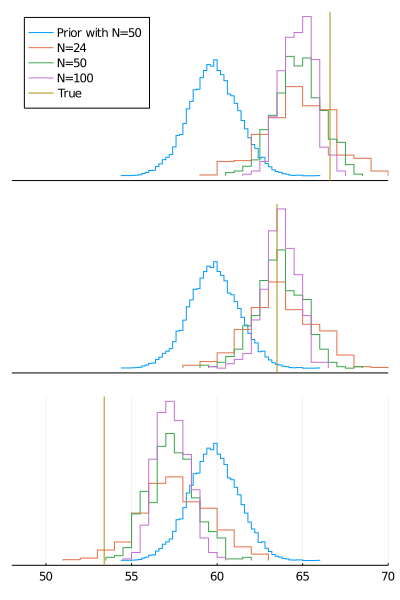

In [51]:
up = stephist(prior, normalize=:pdf, label="Prior with N=50")
stephist!(up, resu[:,1,1], normalize=:pdf, label="N=24")
stephist!(up, resu[:,2,1], normalize=:pdf, label="N=50")
stephist!(up, resu[:,3,1], normalize=:pdf, yaxis=false, xlims=(48,70), 
    label="N=100", legend=:topleft, yticks=false, xticks=false)
vline!(up, [66.6], label="True")
#up = vline([66.6], label="True", yaxis=false, xlims=(48,70), 
#     legend=false, yticks=false, xticks=false)

mid = stephist(prior, normalize=:pdf)
stephist!(mid, resu[:,1,2], normalize=:pdf)
stephist!(mid, resu[:,2,2], normalize=:pdf)
stephist!(mid, resu[:,3,2], normalize=:pdf, yaxis=false, xlims=(48,70), 
    legend=false, yticks=false, xticks=false)
vline!(mid, [63.5])
#mid = vline([63.5], yaxis=false, xlims=(48,70), 
#      legend=false, yticks=false, xticks=false)

low = stephist(prior, normalize=:pdf)
stephist!(low, resu[:,1,3], normalize=:pdf)
stephist!(low, resu[:,2,3], normalize=:pdf)
stephist!(low, resu[:,3,3], normalize=:pdf, yaxis=false, xlims=(48,70), 
    legend=false, yticks=false)
vline!(low, [53.4])
#low = vline( [53.4], yaxis=false, xlims=(48,70), 
#     legend=false, yticks=false, xticks=false)

plot(up, mid, low, layout=(3,1), size=(400,600))

#savefig("../../THESIS/thesis/figures/fake_earth_res.png")
#savefig("../../present/mcdonough/fake_earth_config.png")

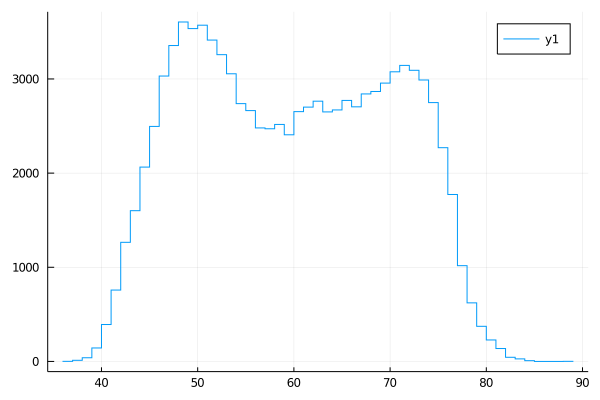

In [53]:
stephist(bsr[:,si_j])
stephist!